In [125]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data = sns.load_dataset('iris')

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [129]:
y = data['species']

X = data[["sepal_length", "petal_length"]]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
clf = DecisionTreeClassifier()

In [134]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
#X_test = scaler.transform(X_test)
clf.score(X_test, y_test)

0.92

In [136]:
#!pip install graphviz

In [137]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [138]:
import graphviz

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="iris_tree.dot", 
                feature_names=X.columns,
                class_names=['setosa','versicolor','verginica'], 
                rounded=True, filled=True)


In [139]:
print("Indice de Gini Root Node ==>", 1 - (31/ 100)**2 - (35/100)**2 - (34/100)**2)

print("Indice de Gini Internal Orange Node ==>", 1 - (31/ 31)**2 - (0/31)**2 - (0/31)**2)

print("Indice de Gini Internal Blanc Node ==>", 1 - (0/ 69)**2 - (35/69)**2 - (34/69)**2)

print("Indice de Gini Leaf Blanc Node ==>", 1 - (0/ 2)**2 - (1/2)**2 - (1/2)**2)

Indice de Gini Root Node ==> 0.6658000000000001
Indice de Gini Internal Orange Node ==> 0.0
Indice de Gini Internal Blanc Node ==> 0.4998949800462088
Indice de Gini Leaf Blanc Node ==> 0.5


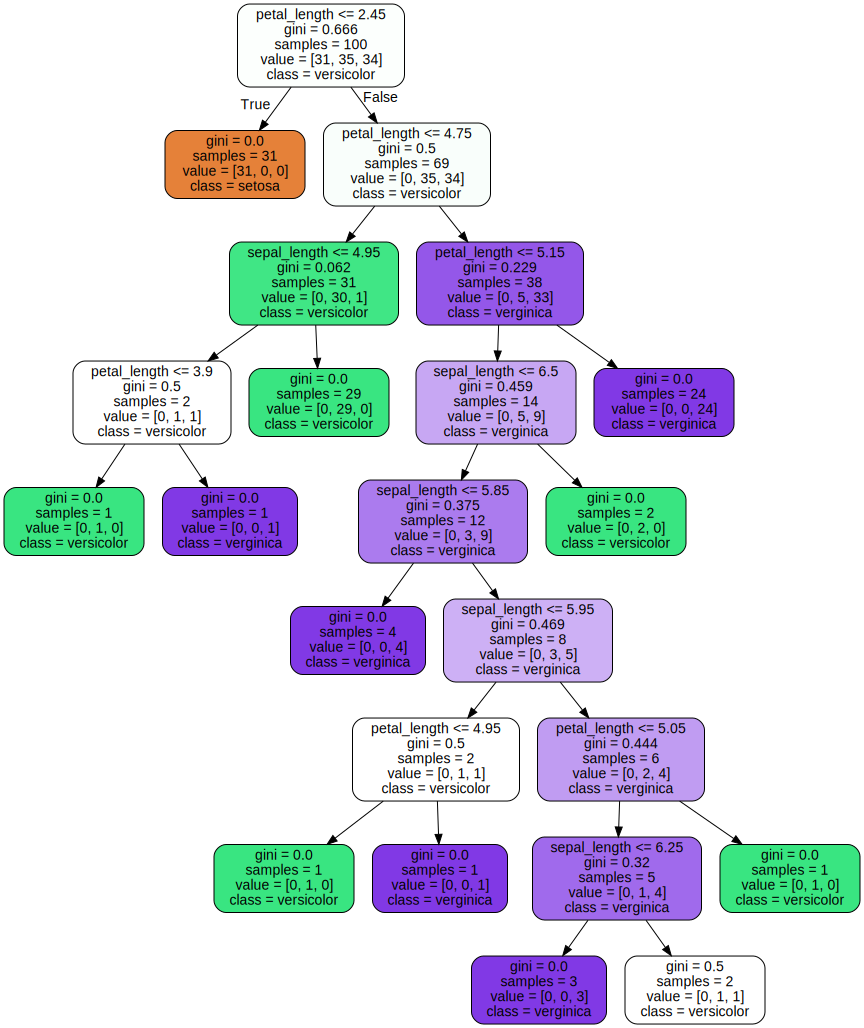

In [140]:
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   petal_length  150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [142]:
from sklearn.preprocessing import OrdinalEncoder

In [143]:
enc = OrdinalEncoder()
enc.fit(pd.DataFrame(y))
y_encoded = enc.transform(pd.DataFrame(y))

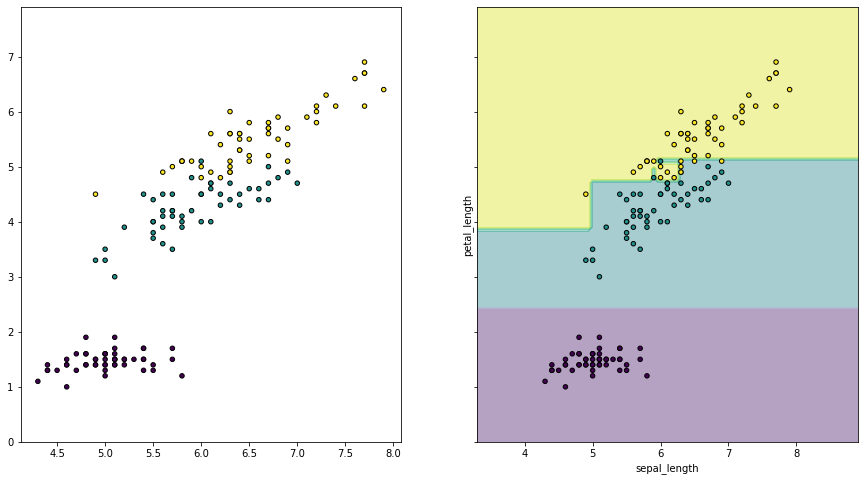

In [144]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plotting decision regions
f, ((ax1,ax2)) = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(15, 8))

DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=ax2, response_method="predict"
    )

ax1.scatter(X["sepal_length"], X["petal_length"], c=y_encoded, s=20, edgecolor="k")


ax2.scatter(X["sepal_length"], X["petal_length"], c=y_encoded, s=20, edgecolor="k")

plt.show()

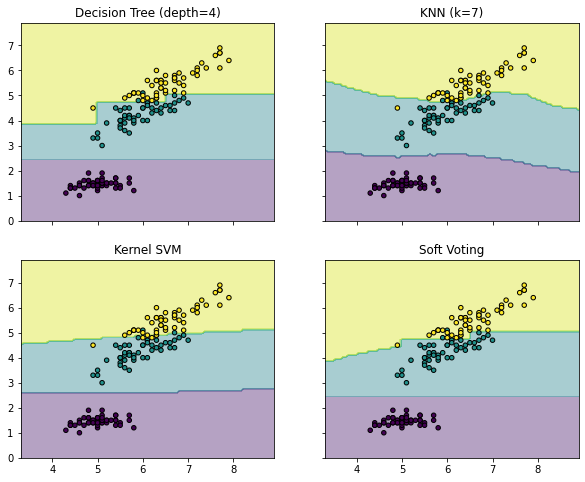

In [145]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )

    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

---------------------------------------------------

------------------------------------------

1. Prendre en main le notebook. 
2. Essayer l'algo sur un autre jeu de donnée. 
3. Réaliser une grid search et/ou randomize search sur les hyperparametres du model
4. Afficher la learning curve

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import set_config
from itertools import product
import warnings


warnings.filterwarnings('ignore')
set_config(display="diagram")

In [147]:
data = sns.load_dataset('penguins')
data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,Male
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,Female
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [149]:
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [150]:
data.drop(columns='sex', inplace=True)

In [151]:
data.dropna(inplace=True)

In [152]:
len(data)-len(data.drop_duplicates())

0

In [153]:
y = data['species']
X = pd.get_dummies(data.drop(columns=['species']), drop_first=True)

In [154]:
df_fig = pd.concat([X,pd.get_dummies(y)], axis=1)

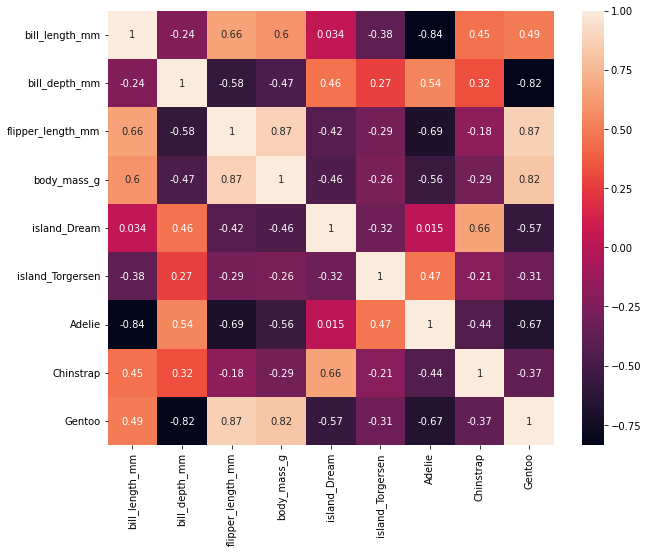

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(df_fig.corr(), annot=True);

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [157]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = pd.DataFrame(mms.transform(X_train)).rename(columns={i:X.columns.tolist()[i] for i in range(len(X.columns.tolist()))})
X_test_scaled = pd.DataFrame(mms.transform(X_test)).rename(columns={i:X.columns.tolist()[i] for i in range(len(X.columns.tolist()))})

In [158]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [159]:
clf.score(X_test_scaled, y_test)

0.970873786407767

In [160]:
import graphviz

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="penguins.dot", 
                feature_names=X_train.columns,
                class_names=['Adelie', 'Chinstrap', 'Gentoo'], 
                rounded=True, filled=True)

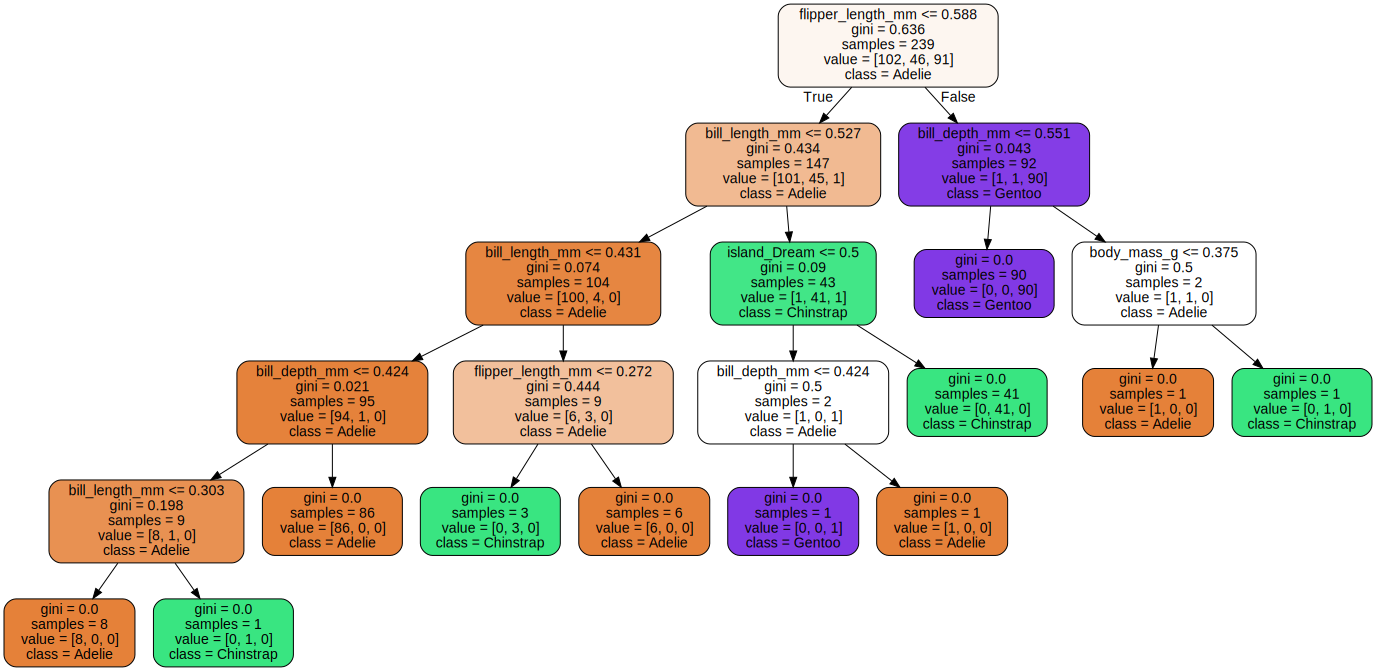

In [161]:
with open("penguins.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

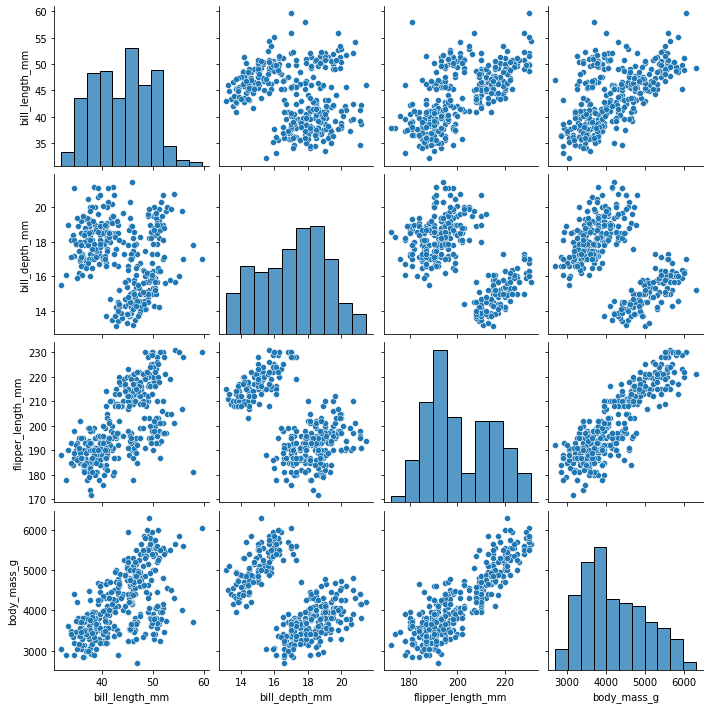

In [187]:
sns.pairplot(X.drop(columns=['island_Dream', 'island_Torgersen']));

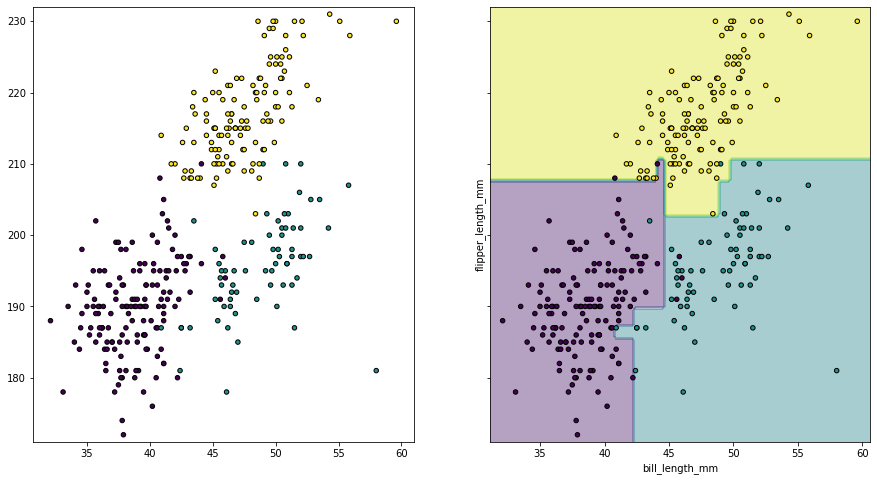

In [173]:
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train[['bill_length_mm','flipper_length_mm']], y_train)
f, ((ax1,ax2)) = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(15, 8))
DecisionBoundaryDisplay.from_estimator(clf_2, X[['bill_length_mm','flipper_length_mm']], alpha=0.4, ax=ax2, response_method="predict"    )
ax1.scatter(X['bill_length_mm'], X['flipper_length_mm'], c=y_encoded, s=20, edgecolor="k")
ax2.scatter(X['bill_length_mm'], X['flipper_length_mm'], c=y_encoded, s=20, edgecolor="k")
plt.show()

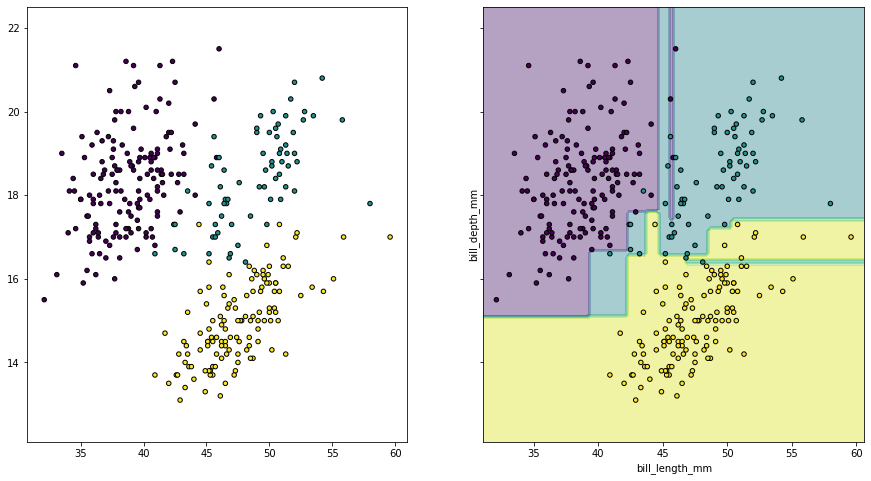

In [198]:
clf_3 = DecisionTreeClassifier()
clf_3.fit(X_train[['bill_length_mm','bill_depth_mm']], y_train)
f, ((ax1,ax2)) = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(15, 8))
DecisionBoundaryDisplay.from_estimator(clf_3, X[['bill_length_mm','bill_depth_mm']], alpha=0.4, ax=ax2, response_mngthod="predict"    )
ax1.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=y_encoded, s=20, edgecolor="k")
ax2.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=y_encoded, s=20, edgecolor="k")
plt.show()

In [162]:
enc = OrdinalEncoder()
enc.fit(pd.DataFrame(y))
y_encoded = enc.transform(pd.DataFrame(y))

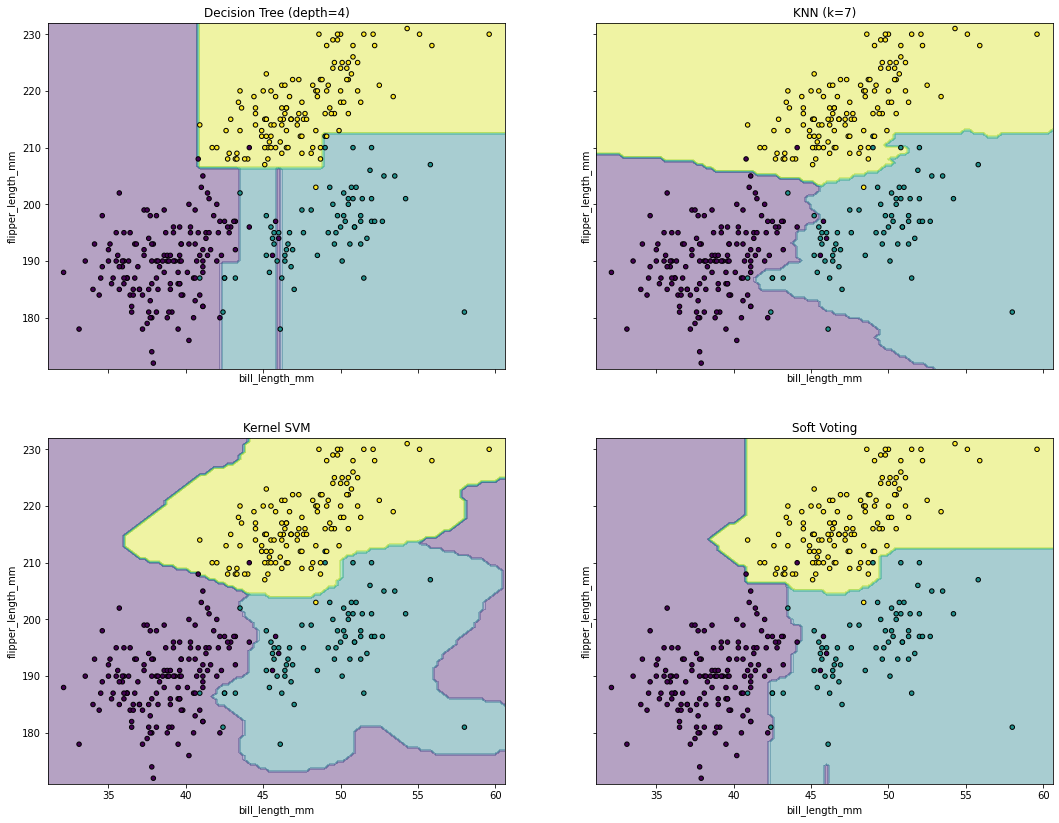

In [197]:
X_vis = X[['bill_length_mm','flipper_length_mm']]

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2])

clf1.fit(X_vis, y)
clf2.fit(X_vis, y)
clf3.fit(X_vis, y)
eclf.fit(X_vis, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(18, 14))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X_vis, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )

    axarr[idx[0], idx[1]].scatter(X['bill_length_mm'], X['flipper_length_mm'], c=y_encoded, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [204]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
         'splitter' : ['best', 'random'],
         'max_depth' : [1,2,3,4,5]}

grid = GridSearchCV(DecisionTreeClassifier(), param, scoring="r2")
grid.fit(X_train, y_train)

display(grid.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [221]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid.best_estimator_,
    X=X,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 80, 100])

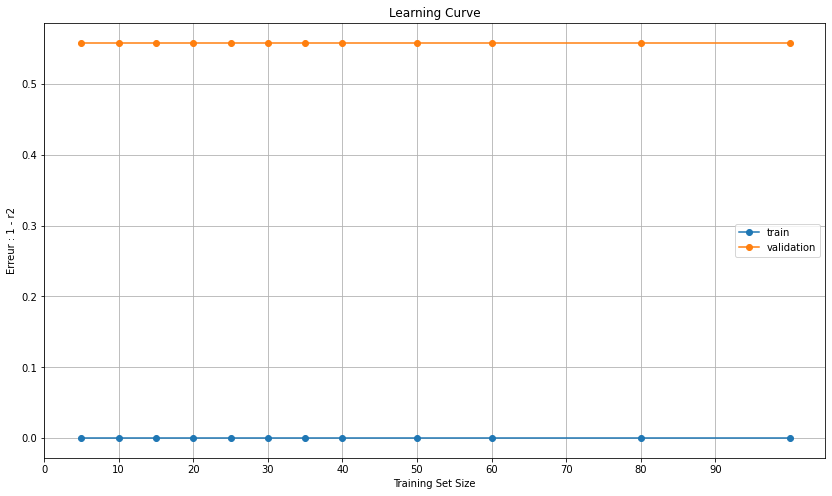

In [222]:
train_mean = 1-train_scores.mean(axis=1)
test_mean = 1-test_scores.mean(axis=1)

plt.subplots(figsize=(14,8))
plt.plot(train_sizes, train_mean, label="train", marker='o')
plt.plot(train_sizes, test_mean, label="validation", marker='o')

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.xticks(np.arange(0, 100, 10))
plt.ylabel("Erreur : 1 - r2")
plt.legend(loc="best")
plt.grid(True)
plt.show()